# EDA of MiLB Data
Finding out the basic distributions and information of the data.

## Imports and Load Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
%matplotlib inline
import seaborn as sns

Note that these are the qualified batters seperated by player and year.

In [2]:
# Load data
df_AAA = pd.read_csv(
    "data/fangraphs-minor-leagues/fangraphs-minor-league-leaders-AAA.csv"
)
df_AA = pd.read_csv(
    "data/fangraphs-minor-leagues/fangraphs-minor-league-leaders-AA.csv"
)
df_High_A = pd.read_csv(
    "data/fangraphs-minor-leagues/fangraphs-minor-league-leaders-A+.csv"
)
df_A = pd.read_csv("data/fangraphs-minor-leagues/fangraphs-minor-league-leaders-A.csv")
df_Low_A = pd.read_csv(
    "data/fangraphs-minor-leagues/fangraphs-minor-league-leaders-A-.csv"
)

In [3]:
# Combine into one dataframe
df_milb = pd.concat([df_AAA, df_AA, df_High_A, df_A, df_Low_A], axis=0)
df_milb

,Season,Name,Team,Level,Age,PA,BB%,K%,BB/K,AVG,...,OPS,ISO,Spd,BABIP,wSB,wRC,wRAA,wOBA,wRC+,PlayerId
0,2017,Alfredo Amezaga,MEX,AAA,39,345,0.084058,0.144928,0.580000,0.286184,...,0.727245,0.082237,2.804900,0.330677,-0.922141,42.552464,-2.610697,0.341637,99.646364,1
1,2021,Christian Bethancourt,PIT,AAA,29,363,0.077135,0.201102,0.383562,0.280967,...,0.807121,0.187311,3.993813,0.321138,-0.051182,53.392867,6.849653,0.352873,115.044406,10028
2,2018,Christian Bethancourt,MIL,AAA,26,418,0.047847,0.181818,0.263158,0.296675,...,0.834145,0.209719,3.856732,0.318937,0.664623,61.606054,7.040671,0.358496,88.505452,10028
3,2015,Grant Green,LAA,AAA,27,414,0.043478,0.169082,0.257143,0.306494,...,0.785936,0.142857,5.328233,0.358730,-1.114418,55.002681,3.601120,0.346501,100.104070,10053
4,2021,Tomas Telis,MIN,AAA,30,453,0.057395,0.128035,0.448276,0.295508,...,0.758396,0.122931,3.879933,0.319209,-0.022126,60.593341,2.510488,0.336984,99.557702,10067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551,2017,Yariel Gonzalez,STL,A-,23,238,0.075630,0.138655,0.545455,0.305164,...,0.746814,0.084507,2.517576,0.344262,-0.383527,32.367865,6.432753,0.352849,121.963592,sa920278
552,2017,Chance Shepard,WSN,A-,22,218,0.155963,0.293578,0.531250,0.248619,...,0.830123,0.209945,5.161733,0.342342,0.218882,35.711917,11.956226,0.391946,149.798603,sa920915
553,2017,Bryan Araiza,ARI,A-,21,286,0.129371,0.248252,0.521127,0.211618,...,0.619806,0.091286,6.181899,0.284884,0.211178,29.571627,-6.261515,0.298356,88.200525,sa922505
554,2019,Reinaldo Ilarraza,SDP,A-,20,286,0.171329,0.209790,0.816667,0.222222,...,0.697514,0.119658,8.054796,0.272189,2.978264,37.465803,2.877421,0.340731,115.139718,sa923239


In [4]:
# Fix faulty MiLB player IDs
df_milb["PlayerId"] = df_milb["PlayerId"].str.replace(r"\D", "", regex=True).astype(int)
df_milb

,Season,Name,Team,Level,Age,PA,BB%,K%,BB/K,AVG,...,OPS,ISO,Spd,BABIP,wSB,wRC,wRAA,wOBA,wRC+,PlayerId
0,2017,Alfredo Amezaga,MEX,AAA,39,345,0.084058,0.144928,0.580000,0.286184,...,0.727245,0.082237,2.804900,0.330677,-0.922141,42.552464,-2.610697,0.341637,99.646364,1
1,2021,Christian Bethancourt,PIT,AAA,29,363,0.077135,0.201102,0.383562,0.280967,...,0.807121,0.187311,3.993813,0.321138,-0.051182,53.392867,6.849653,0.352873,115.044406,10028
2,2018,Christian Bethancourt,MIL,AAA,26,418,0.047847,0.181818,0.263158,0.296675,...,0.834145,0.209719,3.856732,0.318937,0.664623,61.606054,7.040671,0.358496,88.505452,10028
3,2015,Grant Green,LAA,AAA,27,414,0.043478,0.169082,0.257143,0.306494,...,0.785936,0.142857,5.328233,0.358730,-1.114418,55.002681,3.601120,0.346501,100.104070,10053
4,2021,Tomas Telis,MIN,AAA,30,453,0.057395,0.128035,0.448276,0.295508,...,0.758396,0.122931,3.879933,0.319209,-0.022126,60.593341,2.510488,0.336984,99.557702,10067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551,2017,Yariel Gonzalez,STL,A-,23,238,0.075630,0.138655,0.545455,0.305164,...,0.746814,0.084507,2.517576,0.344262,-0.383527,32.367865,6.432753,0.352849,121.963592,920278
552,2017,Chance Shepard,WSN,A-,22,218,0.155963,0.293578,0.531250,0.248619,...,0.830123,0.209945,5.161733,0.342342,0.218882,35.711917,11.956226,0.391946,149.798603,920915
553,2017,Bryan Araiza,ARI,A-,21,286,0.129371,0.248252,0.521127,0.211618,...,0.619806,0.091286,6.181899,0.284884,0.211178,29.571627,-6.261515,0.298356,88.200525,922505
554,2019,Reinaldo Ilarraza,SDP,A-,20,286,0.171329,0.209790,0.816667,0.222222,...,0.697514,0.119658,8.054796,0.272189,2.978264,37.465803,2.877421,0.340731,115.139718,923239


## Overview of Data

In [5]:
df_milb.shape

(6370, 22)

In [6]:
df_milb.describe()

,Season,Age,PA,BB%,K%,BB/K,AVG,OBP,SLG,OPS,ISO,Spd,BABIP,wSB,wRC,wRAA,wOBA,wRC+,PlayerId
count,6370.000000,6370.000000,6370.000000,6370.000000,6370.000000,6370.000000,6370.000000,6370.000000,6370.000000,6370.000000,6370.000000,6370.000000,6370.000000,6370.000000,6370.000000,6370.000000,6370.000000,6370.000000,6.370000e+03
mean,2019.378179,23.409419,428.495133,0.094137,0.214735,0.475905,0.259488,0.337247,0.400698,0.737946,0.141210,5.009738,0.317089,0.081049,55.500478,2.649543,0.338022,104.399332,1.092995e+06
std,3.279993,3.469496,81.678083,0.032645,0.064262,0.221171,0.033623,0.036691,0.068981,0.094576,0.054002,1.772165,0.035633,1.557585,16.914511,11.595045,0.036641,21.794156,1.232468e+06
min,2015.000000,17.000000,198.000000,0.007614,0.023923,0.035714,0.155844,0.209524,0.201149,0.426696,0.010309,0.362452,0.193548,-6.668129,6.836025,-41.662456,0.209388,19.750182,1.000000e+00
25%,2017.000000,21.000000,388.000000,0.071023,0.168964,0.323364,0.237156,0.312318,0.350490,0.671760,0.101610,3.679029,0.292683,-0.852816,44.115261,-5.185829,0.312603,89.714680,1.998300e+04
50%,2019.000000,23.000000,433.000000,0.091861,0.211778,0.437500,0.258065,0.335989,0.396175,0.732419,0.136612,5.039687,0.316235,-0.126891,54.946508,2.246958,0.336759,104.069522,6.581790e+05
75%,2022.000000,25.000000,483.000000,0.114845,0.258296,0.580000,0.280693,0.360854,0.444045,0.797940,0.174705,6.321240,0.340820,0.737529,66.049111,10.085923,0.362248,118.569825,3.004865e+06
max,2025.000000,42.000000,652.000000,0.225806,0.442827,2.187500,0.390728,0.478079,0.741758,1.177355,0.415865,9.979305,0.466667,10.966039,137.000768,53.073981,0.496585,188.716066,3.067045e+06


In [7]:
df_milb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6370 entries, 0 to 555
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Season    6370 non-null   int64  
 1   Name      6370 non-null   object 
 2   Team      6370 non-null   object 
 3   Level     6370 non-null   object 
 4   Age       6370 non-null   int64  
 5   PA        6370 non-null   int64  
 6   BB%       6370 non-null   float64
 7   K%        6370 non-null   float64
 8   BB/K      6370 non-null   float64
 9   AVG       6370 non-null   float64
 10  OBP       6370 non-null   float64
 11  SLG       6370 non-null   float64
 12  OPS       6370 non-null   float64
 13  ISO       6370 non-null   float64
 14  Spd       6370 non-null   float64
 15  BABIP     6370 non-null   float64
 16  wSB       6370 non-null   float64
 17  wRC       6370 non-null   float64
 18  wRAA      6370 non-null   float64
 19  wOBA      6370 non-null   float64
 20  wRC+      6370 non-null   float64
 2

In [8]:
# Missing data
df_milb.isnull().sum()

Season      0
Name        0
Team        0
Level       0
Age         0
PA          0
BB%         0
K%          0
BB/K        0
AVG         0
OBP         0
SLG         0
OPS         0
ISO         0
Spd         0
BABIP       0
wSB         0
wRC         0
wRAA        0
wOBA        0
wRC+        0
PlayerId    0
dtype: int64

There are no missing data.

In [9]:
for col in df_milb.columns:
    print(f"{col}: {df_milb[col].nunique()}")

Season: 10
Name: 3452
Team: 31
Level: 5
Age: 26
PA: 419
BB%: 4396
K%: 5162
BB/K: 2953
AVG: 4161
OBP: 4556
SLG: 4978
OPS: 6369
ISO: 5140
Spd: 6365
BABIP: 3660
wSB: 6347
wRC: 6370
wRAA: 6370
wOBA: 6370
wRC+: 6370
PlayerId: 3468


Observations:
* Feature statistics (BB%, K%, etc.) have duplicates which makes sense since players can have the same walk rate, strikeout rate, and others for a single statistic.
* Target statistics (wRC, wRAA, wOBA, wRC+) are all be unique since the combination of individual statistic to make up these target values are unlikely to be shared by any two players.
* `PlayerId` should be used as the primary key since each value is unique unlike the `Name` feature where some players share the same name.

## Distribution of Season, Team, and Level Features

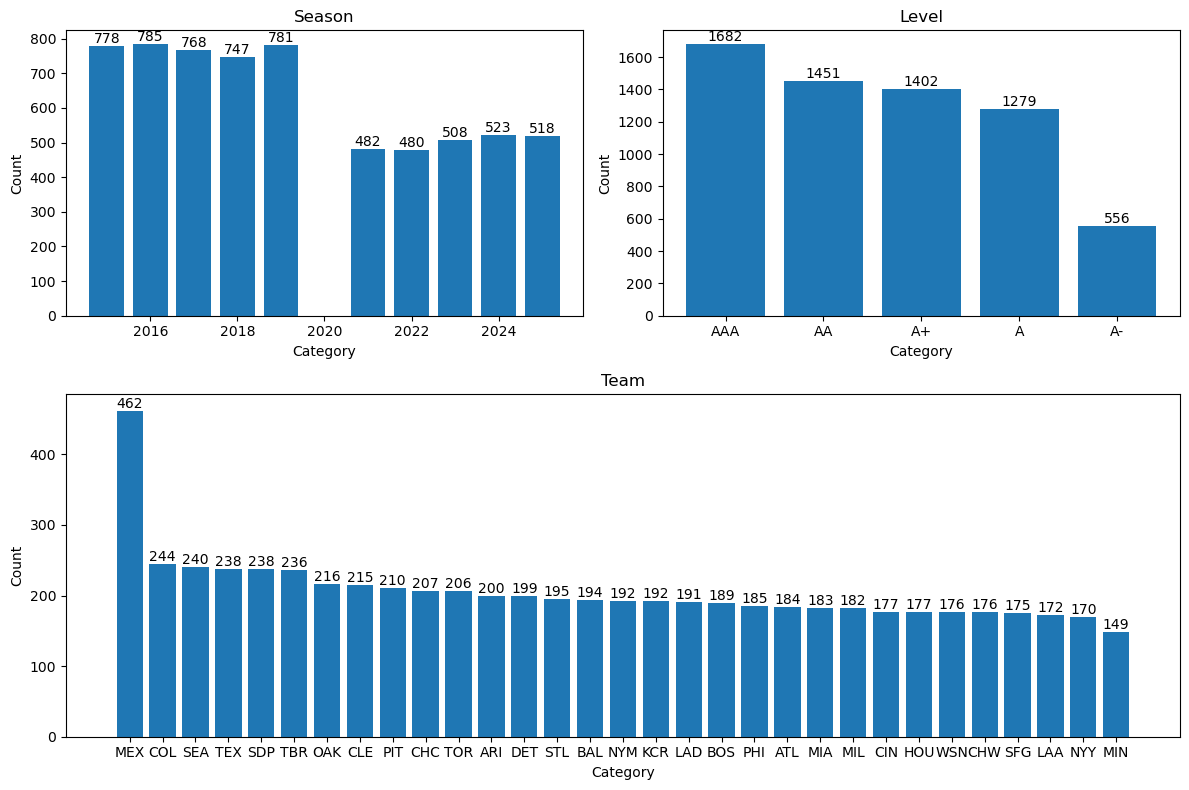

In [10]:
# Define categorical features
categorical_cols = ["Season", "Level", "Team"]

# Initialize layout
fig = plt.figure(figsize=(12, 8))
gs = GridSpec(2, 2, height_ratios=[1, 1.2])  # 2 rows, 2 columns

# Top row: "Season" and "Level" side by side
axes = []
axes.append(fig.add_subplot(gs[0, 0]))
axes.append(fig.add_subplot(gs[0, 1]))

# Bottom row: "Team" spans both columns (wider plot)
axes.append(fig.add_subplot(gs[1, :]))

for ax, col in zip(axes, categorical_cols):
    counts = df_milb[col].value_counts()
    bars = ax.bar(counts.index, counts.values)
    ax.set_title(col)
    ax.set_xlabel("Category")
    ax.set_ylabel("Count")

    # Add count labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            str(height),
            ha="center",
            va="bottom",
        )

plt.tight_layout()
plt.show()

Observations:
* There were no games played in the MiLB during the 2020 season due to COVID.
* Triple-A has the highest count of values from this dataset and the number of data from each league decreases as the league lowers in level.
* The distribution of data from each team is relatively equivalent aside from the MEX team which has 462 data points.

## Age and Plate Appearance (PA) Distribution

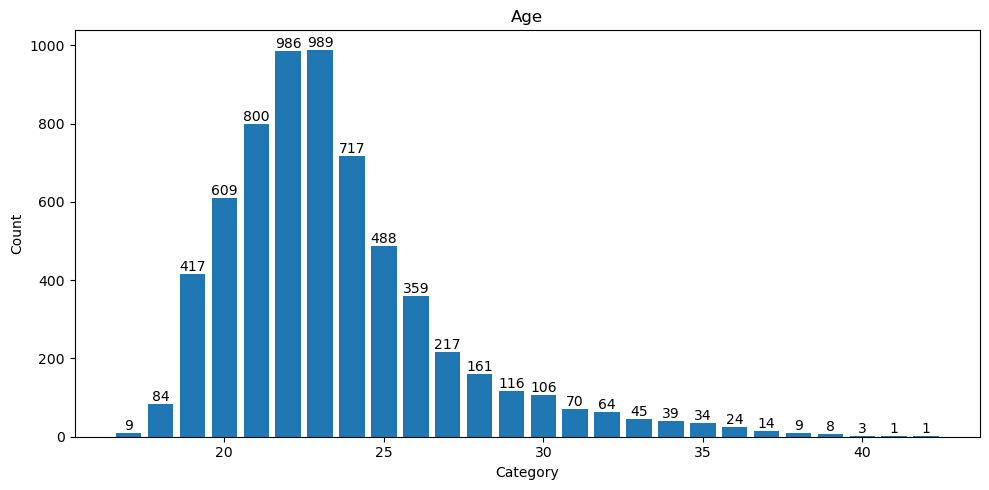

In [11]:
# Plot layout
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

# Get counts for Age distribution
counts = df_milb["Age"].value_counts()
bars = ax.bar(counts.index, counts.values)

# Title and labels
ax.set_title("Age")
ax.set_xlabel("Category")
ax.set_ylabel("Count")

# Add count labels on top of each bar
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        str(height),
        ha="center",
        va="bottom",
    )

# Display
plt.tight_layout()
plt.show()

The majority of players in the minor leagues are players in their 20s.

<Axes: xlabel='PA', ylabel='Count'>

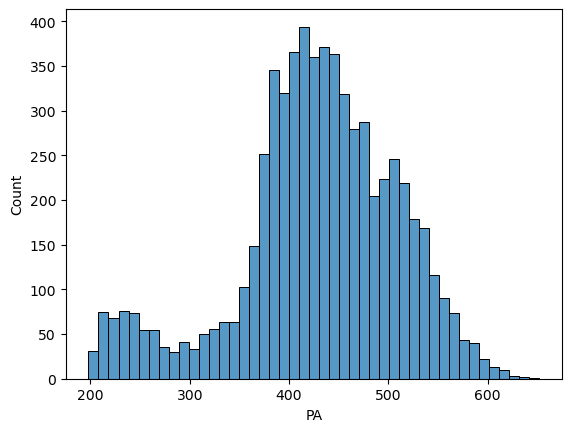

In [12]:
# Histogram for PA
sns.histplot(df_milb, x="PA")

There is a small bimodality to the PA distribution in the MiLB where the two peaks can be found around 450 PA and 250 PA with a dip around 300 PA. This may be explained to either:
1) sampling noise
2) a certain type of performance exhibited by those within the 250 PA range where the players may get called up to the MLB or sent back down to AA

## Feature Statistics Distribution

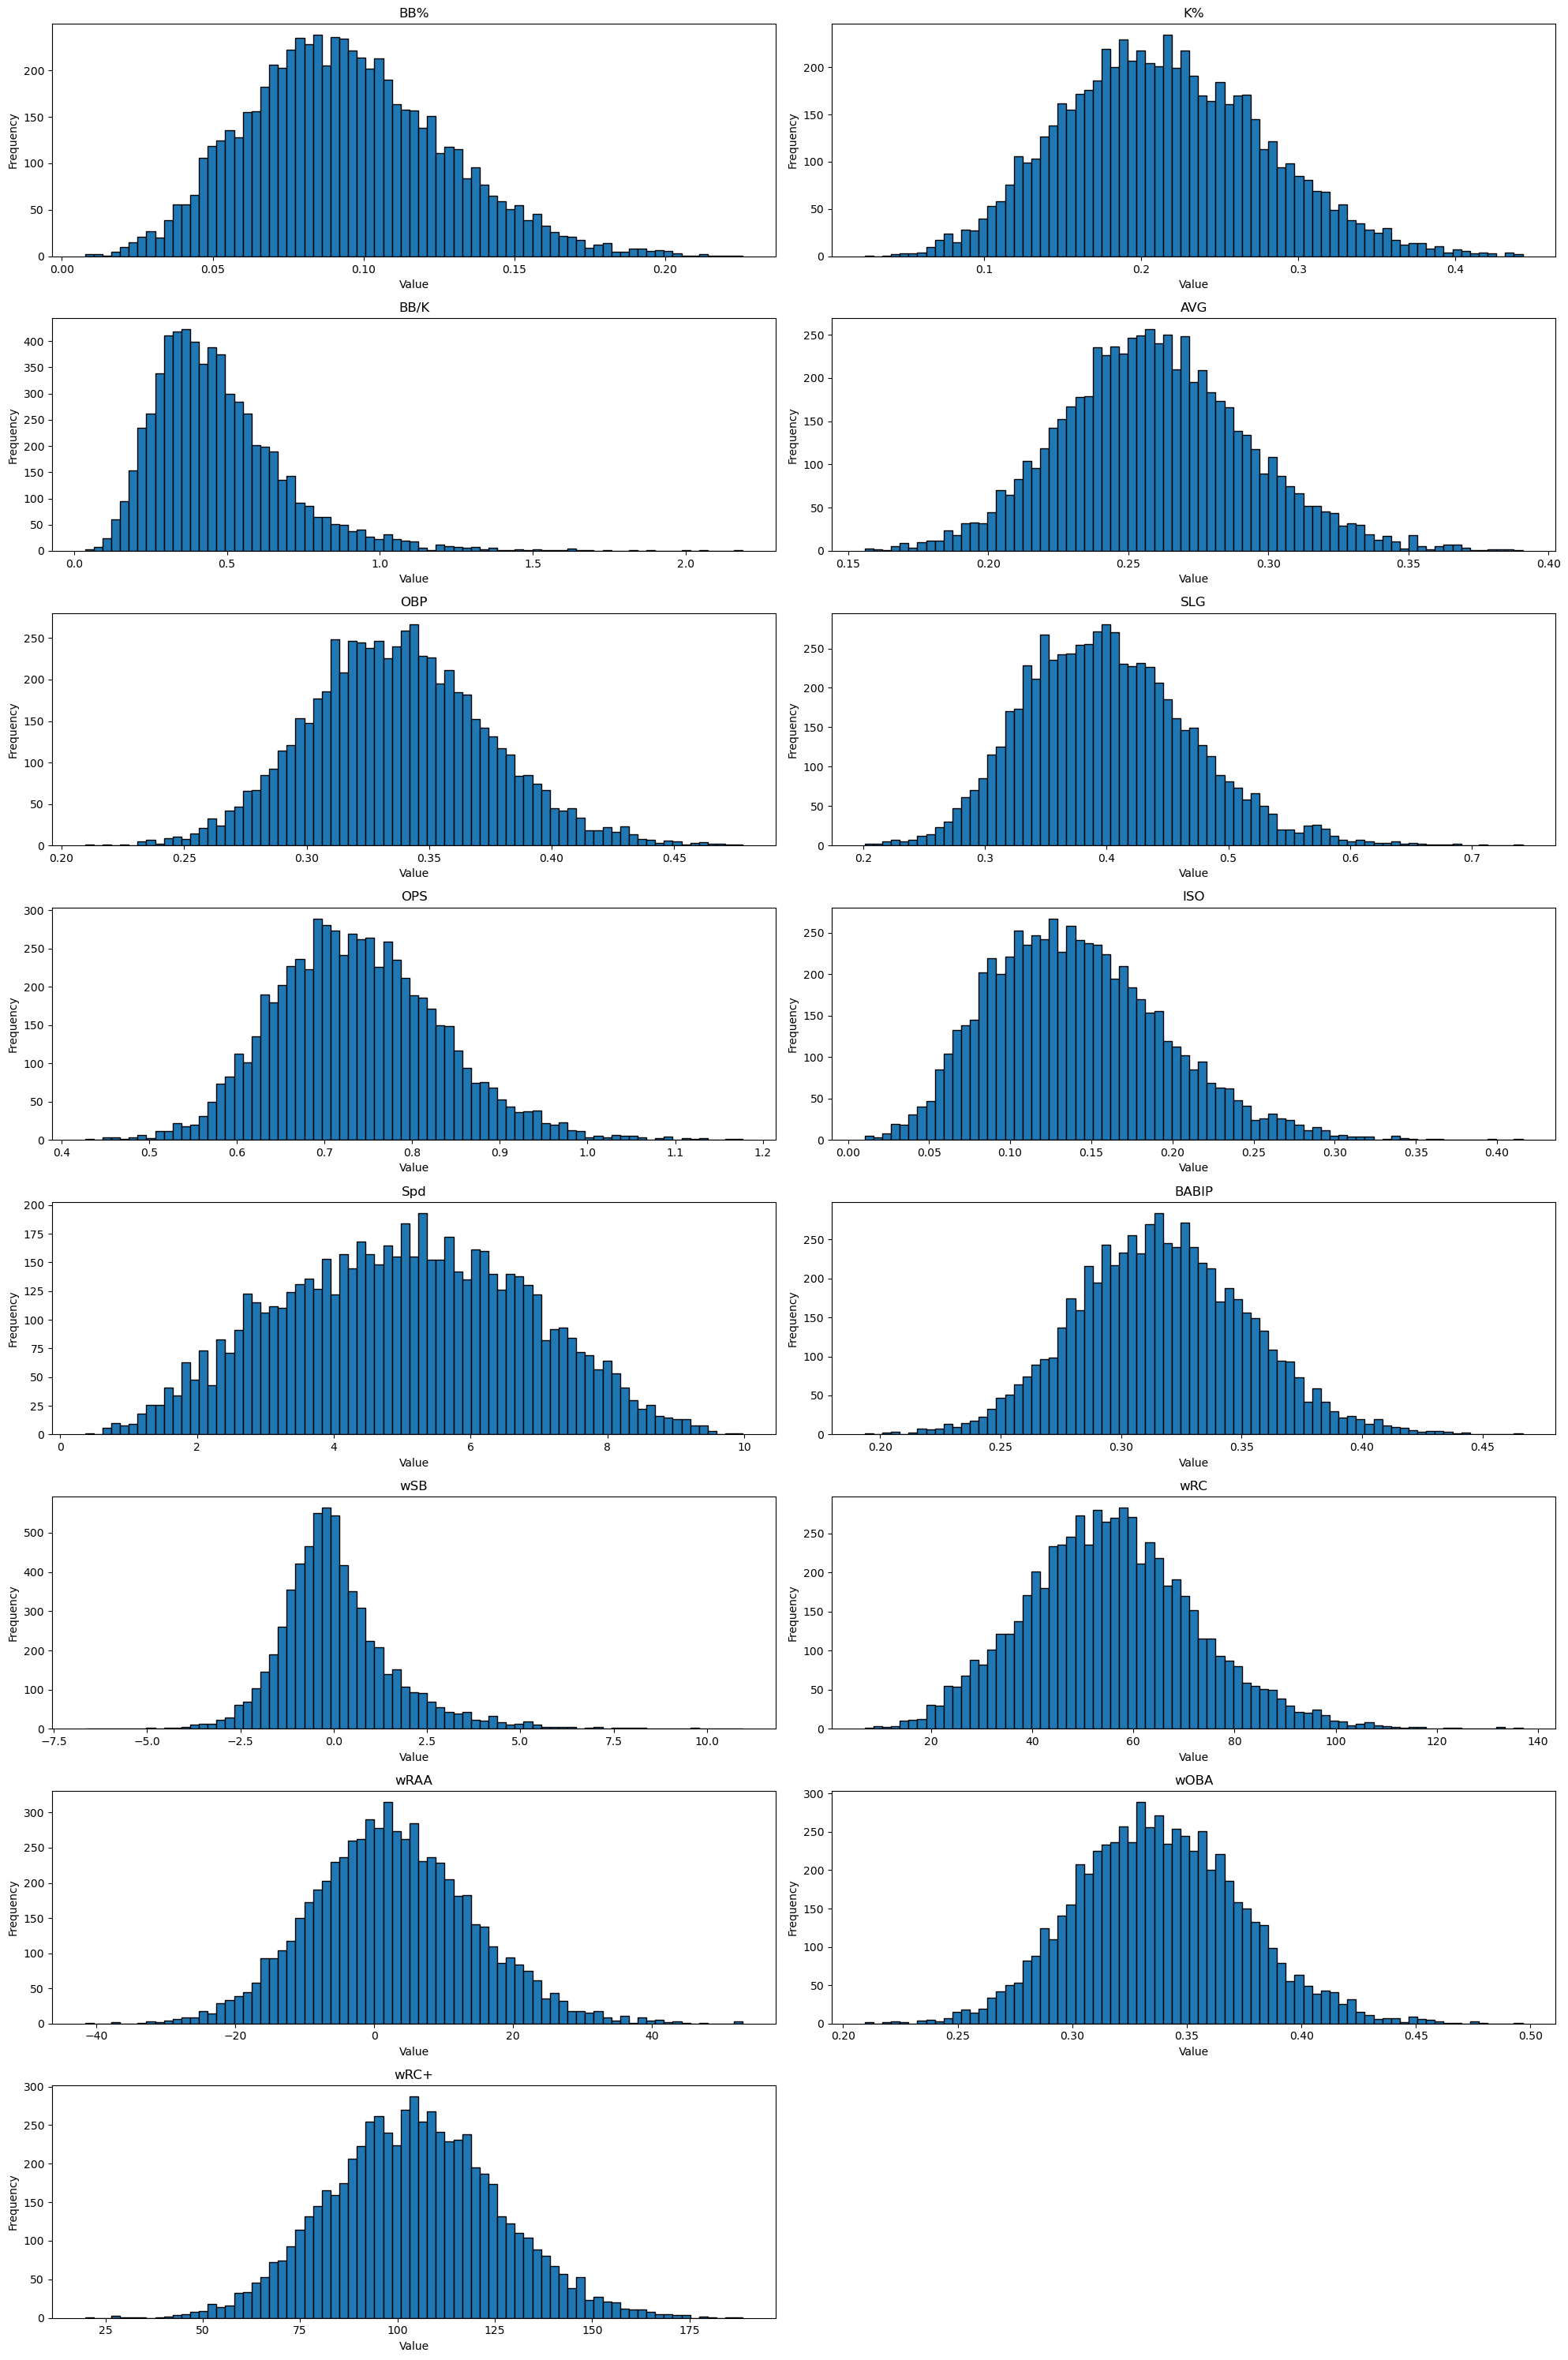

In [13]:
# Feature statistics columns
stats_cols = [
    "BB%",
    "K%",
    "BB/K",
    "AVG",
    "OBP",
    "SLG",
    "OPS",
    "ISO",
    "Spd",
    "BABIP",
    "wSB",
    "wRC",
    "wRAA",
    "wOBA",
    "wRC+",
]

# Setup plot
fig, axes = plt.subplots(8, 2, figsize=(20, 30), sharey=False)
axes = axes.ravel()

for ax, col in zip(axes, stats_cols):
    # Plot histogram with automatic binning
    n, bins, patches = ax.hist(df_milb[col], bins=75, edgecolor="black")
    ax.set_title(col)
    ax.set_xlabel("Value")
    ax.set_ylabel("Frequency")

[fig.delaxes(ax) for ax in axes.flatten() if not ax.has_data()]  # Remove unusued plots

# Display plots
plt.tight_layout()
plt.show()

All feature statistics have a normal distribution as expected. `BB/K` is skewed to the right as most players average somewhere around a 0.4 BB/K while a gradual handful of players have elite plate discipline that explains the long right tail of the plot.

## Save data

In [14]:
df_milb.to_csv("data/milb-players.csv", index=False)